In [ ]:
a = []
while(1):
    a.append('1')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import os

In [ ]:
sns.set_style('whitegrid')
os.chdir('path to working directory')

In [ ]:
df = pd.read_csv('dataset/hourly_data.csv')

In [ ]:
# Dropping missing values
df = df.dropna()

In [ ]:
# Checking datatypes of all the features
df.dtypes

instance         int64
date            object
season           int64
year             int64
month            int64
hour             int64
holiday          int64
weekday          int64
working_day      int64
weathers_it      int64
temp           float64
atemp          float64
humidity       float64
windspeed      float64
casual           int64
registered       int64
count            int64
dtype: object

In [ ]:
# checking duplicate values
df.duplicated().value_counts()

False    17379
dtype: int64

In [ ]:
df = df.drop_duplicates(subset=["instance"])

In [ ]:
# add step to filter data, eg : temp>0

In [ ]:
# checking missing values in each feature
df.isna().sum()

instance       0
date           0
season         0
year           0
month          0
hour           0
holiday        0
weekday        0
working_day    0
weathers_it    0
temp           0
atemp          0
humidity       0
windspeed      0
casual         0
registered     0
count          0
dtype: int64

In [ ]:
df_v2 = df.drop(["instance", "count", "casual", "registered", "date"], axis=1)  # Drop unnecessary columns
X = df_v2

In [ ]:
X

,season,year,month,hour,holiday,weekday,working_day,weathers_it,temp,atemp,humidity,windspeed
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343


In [ ]:
# EDA
# Display the first few rows of the dataset
print(df.head())

   instance      date  season  year  month  hour  holiday  weekday  \
0         1  01-01-11       1     0      1     0        0        6   
1         2  01-01-11       1     0      1     1        0        6   
2         3  01-01-11       1     0      1     2        0        6   
3         4  01-01-11       1     0      1     3        0        6   
4         5  01-01-11       1     0      1     4        0        6   

   working_day  weathers_it  temp   atemp  humidity  windspeed  casual  \
0            0            1  0.24  0.2879      0.81        0.0       3   
1            0            1  0.22  0.2727      0.80        0.0       8   
2            0            1  0.22  0.2727      0.80        0.0       5   
3            0            1  0.24  0.2879      0.75        0.0       3   
4            0            1  0.24  0.2879      0.75        0.0       0   

   registered  count  
0          13     16  
1          32     40  
2          27     32  
3          10     13  
4           1      

In [ ]:
# Summary statistics
print(df.describe())

         instance        season          year         month          hour  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday   working_day   weathers_it          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

<ipython-input-45-900b4801df29>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


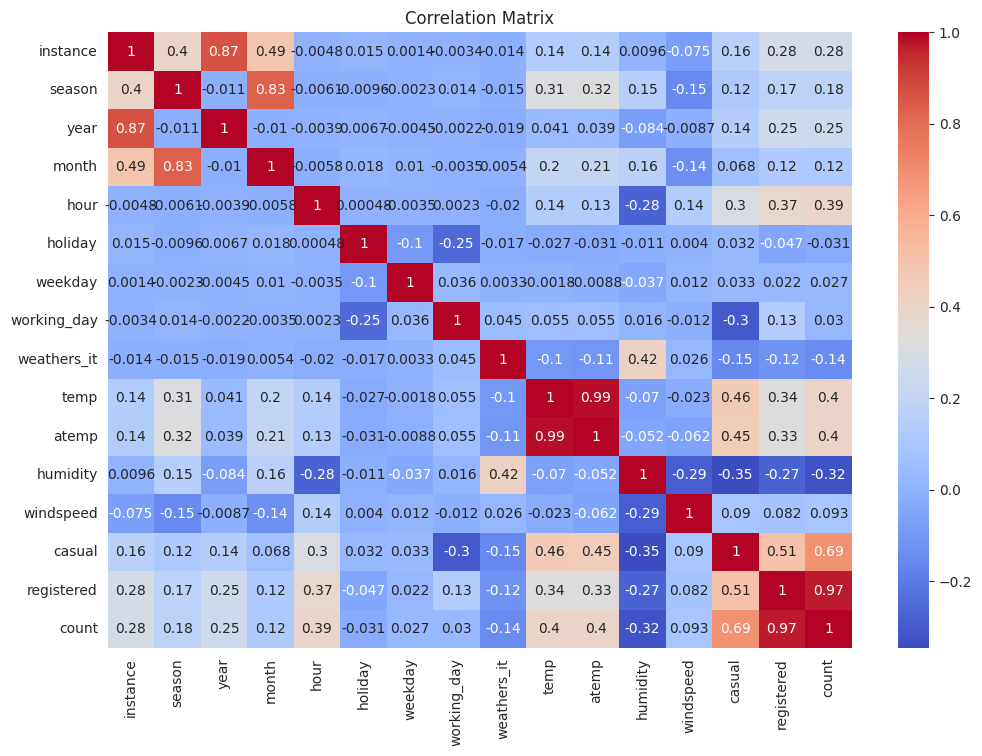

In [ ]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

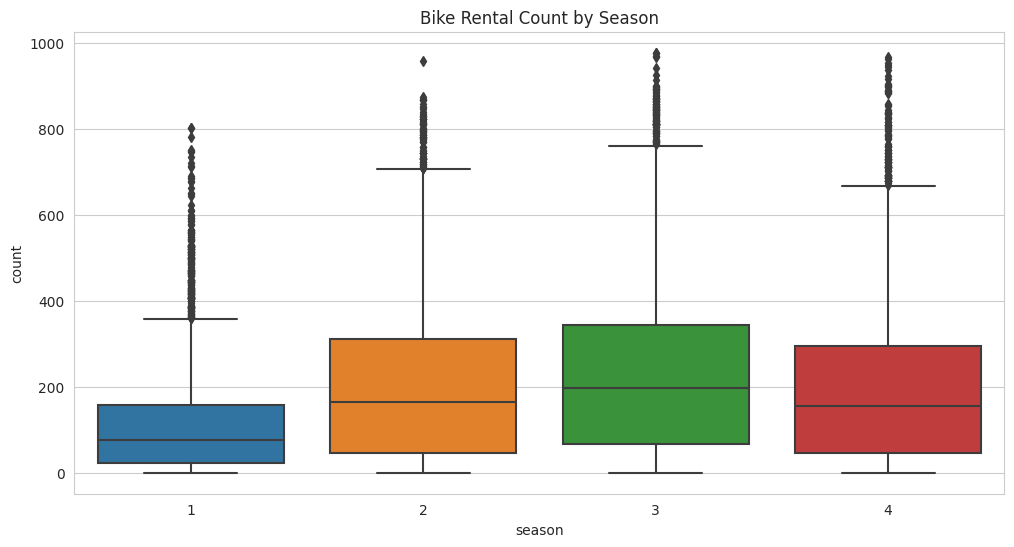

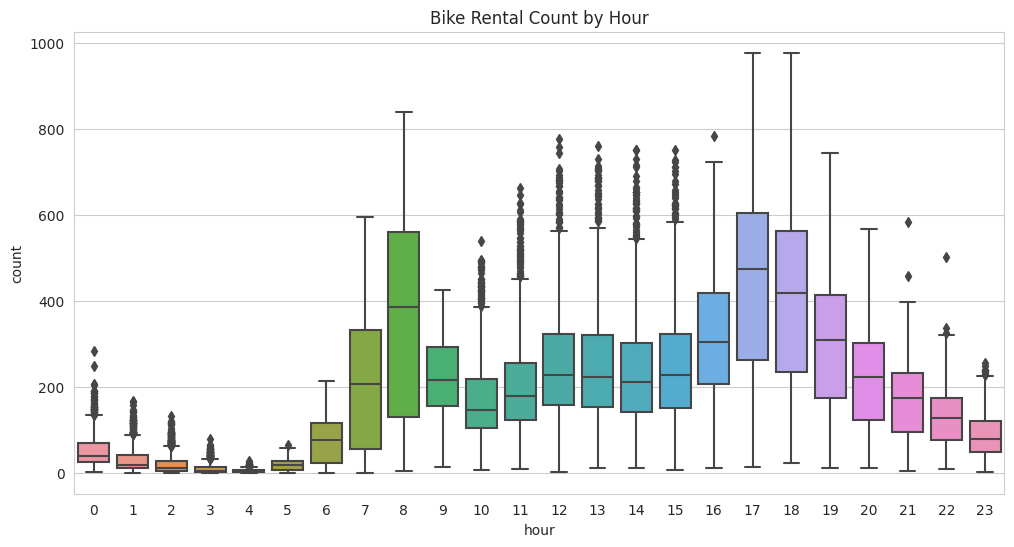

In [ ]:
# Visualize data
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="season", y="count")
plt.title("Bike Rental Count by Season")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="hour", y="count")
plt.title("Bike Rental Count by Hour")
plt.show()

In [ ]:
# Regression model
# X = df.drop(["count", "casual", "registered", "date"], axis=1)  # Drop unnecessary columns
y = df["count"]

In [ ]:
df = df.drop(["instance", "count", "casual", "registered", "date"], axis=1)  # Drop unnecessary columns
X = df

In [ ]:
# Regression models
models = {
    "Linear Regression": LinearRegression(),
    "Stochastic Gradient Boosting": SGDRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "Neural Network": MLPRegressor(random_state=42, max_iter=1000)
}

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = {}

In [ ]:
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {"MSE": mse, "R-squared": r2}

# Compare model performances
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"Mean Squared Error: {metrics['MSE']}")
    print(f"R-squared: {metrics['R-squared']}")
    print("=" * 30)

Linear Regression:
Mean Squared Error: 19379.82836765172
R-squared: 0.38798115831391333
Stochastic Gradient Boosting:
Mean Squared Error: 20061.615493942478
R-squared: 0.3664501850053239
Decision Tree:
Mean Squared Error: 3392.90333716916
R-squared: 0.8928514365053305
Random Forest:
Mean Squared Error: 1769.8364453122304
R-squared: 0.9441082123801563
Support Vector Regressor:
Mean Squared Error: 19686.60357468083
R-squared: 0.3782931361445656
Gradient Boosting:
Mean Squared Error: 4766.55631144745
R-squared: 0.8494712018485715
XGBoost:
Mean Squared Error: 1631.1521079858642
R-squared: 0.9484878913886743
Neural Network:
Mean Squared Error: 7102.3031237248515
R-squared: 0.7757078520705052


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Save the weights of the best-performing model
best_model_name = min(results, key=lambda x: results[x]['MSE'])
best_model = models[best_model_name]
best_model.fit(X_train, y_train)

# Save model weights using pickle
with open("best_model_weights.pkl", "wb") as f:
    pickle.dump(best_model, f)

print(f"Weights of the best model ({best_model_name}) saved to 'best_model_weights.pkl'.")

Weights of the best model (XGBoost) saved to 'best_model_weights.pkl'.


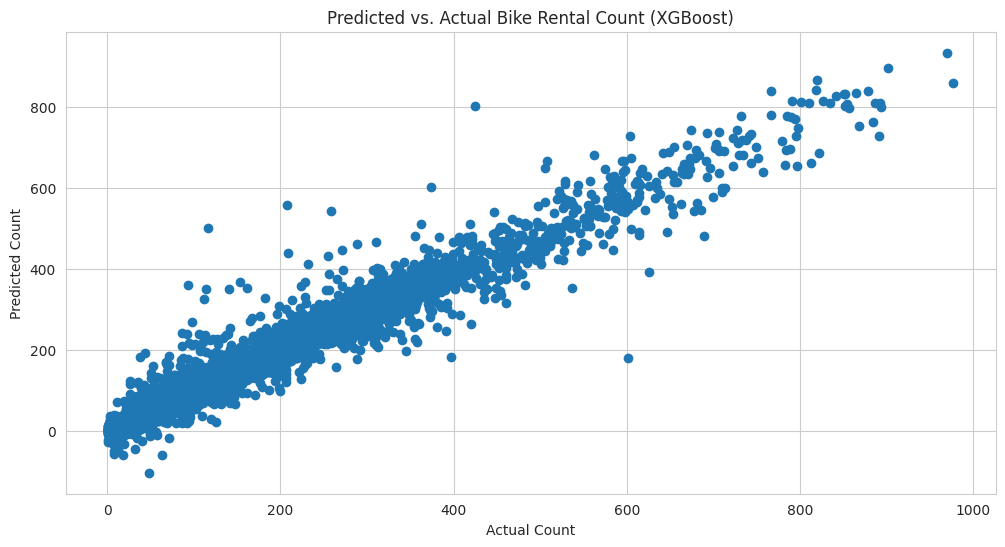

In [ ]:
# Visualize predicted vs. actual counts for the best-performing model
best_model_name = min(results, key=lambda x: results[x]['MSE'])
best_model = models[best_model_name]
best_model.fit(X_train, y_train)
best_y_pred = best_model.predict(X_test)

plt.figure(figsize=(12, 6))
plt.scatter(y_test, best_y_pred)
plt.xlabel("Actual Count")
plt.ylabel("Predicted Count")
plt.title(f"Predicted vs. Actual Bike Rental Count ({best_model_name})")
plt.show()